In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Spotify-Dataset-from-Kaggle.txt')


# Проект «Прогнозирование числа стримов для музыкальных треков»

Датасет Spotify and Youtube взят с сайта Kaggle:  https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

В нашем распоряжении есть данные о популярности музыкальных треков на платформах Spotify и YouTube. Датасет содержит информацию о песнях, таких как название, исполнитель, формат релиза, а также метрику популярности - количество прослушиваний.
В датасете содержится информация о треках 2079 артистов (2079 уникальных названий исполнителей).

### 0. Описание данных

- **Artist** - исполнитель трека (номинальный категориальный).
- **Track** - название трека (номинальный категориальный).
- **Album** -  название альбома (номинальный категориальный).
- **Album_type** - тип альбома (*Single*/*Album*/*Compilation*) (номинальный категориальный).
- **Danceability** - танцевальность трека (*0 – 1*) (числовой, непрерывный). Описывает, насколько подходит трек для танцев на основе сочетания музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность.
- **Energy** - уровень энергии трека (*0 – 1*) (числовой, непрерывный). Описывает перцептивную меру интенсивности и активности. Обычно энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал имеет высокую энергию, в то время как прелюдия Баха имеет низкую оценку по шкале. Перцептивные характеристики, способствующие этому атрибуту, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию.
- **Key** - тональность трека (*0 – 11*, где 0 = C, 1 = C#, …, 11 = B) (числовой, порядковый). Тональность, в которой находится трек. Целые числа сопоставляются с высотой тона с использованием стандартной нотации Pitch Class. Если тональность не обнаружена, значение равно -1.
- **Loudness** - общая громкость трека (*-60 - 0 db*) в децибелах (числовой, непрерывный).
- **Speechiness** - доля вокала в треке (*0 – 1*) (числовой, непрерывный). Определяет наличие произнесенных слов в треке. Чем более запись похожа на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов.
- **Acousticness** - вероятность того, что трек является акустическим (*0 – 1*) (числовой, непрерывный).
- **Instrumentalness** - вероятность того, что трек инструментальный (*0 – 1*) (числовой, непрерывный).
- **Liveness** - вероятность того, что трек записан на живом выступлении (*0 – 1*) (числовой, непрерывный)
- **Valence** - “позитивность” трека (*0 — грустный, 1 — радостный*) (числовой, непрерывный). Описывает музыкальную «позитивность», передаваемую треком. Треки с высоким показателем звучат более позитивно (например, счастливые, веселые, эйфоричные), в то время как треки с низким показателем звучат более негативно (например, грустные, подавленные, злые).
- **Tempo** - темп трека в ударах в минуту (BPM) (числовой, непрерывный). В случае отсутствия данных о BPM или невозможности определения (например для белого шума, звуков природы etc.) значение признака равно 0.0.
- **Duration_ms** - длительность трека в миллисекундах (числовой, дискретный).
- **Stream** - общее количество прослушиваний на Spotify (числовой, дискретный).

Датасет состоит из 16 полей и 20718 строк.

In [3]:
df.head()

,Unnamed: 0,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,1.040235e+09
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,3.100837e+08
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,6.306347e+07
3,3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,4.346636e+08
4,4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,6.172597e+08


**При импорте данных из txt-файла появился столбец "Unnamed: 0", дублирующий индексы датафрейма. Удалим этот столбец и приведём названия столбцов к удобному для работы виду.**

In [4]:
del df['Unnamed: 0']
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,6.172597e+08


# 1. Есть ли пропуски в данных? Какой процент они составляют от числа строк? Почему они могли появиться? Если есть пропуски, выберите способ обработки пропусков для каждого столбца. Расскажите, почему выбрали именно этот способ. Обработайте пропуски.

**Обнаружим пропуски с помощью метода isnull() и просуммируем их по столбцам.**

In [5]:
df.isnull().sum()

,0
artist,0
track,0
album,0
album_type,0
danceability,2
energy,2
key,2
loudness,2
speechiness,2
acousticness,2


**В датасете были обнаружены пропуски в количественных переменных. Посмотрим, в каких строки пропущены данные.**

In [6]:
df[df.isnull().any(axis=1)].sort_values('danceability')

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
6110,CeeLo Green,"Mary, Did You Know?",CeeLo's Magic Moment,album,0.172,0.1910,3.0,-11.458,0.0358,0.8500,0.000000,0.1010,0.2100,76.370,234067.0,NaN
4786,Howard Shore,Feast of Starlight,The Hobbit: The Desolation of Smaug (Original ...,album,0.180,0.0385,2.0,-26.987,0.0425,0.9840,0.977000,0.1160,0.0350,134.666,168000.0,NaN
5780,London Philharmonic Orchestra,The Armed Man - A Mass For Peace: XII. Benedictus,The Armed Man: A Mass For Peace,album,0.187,0.0460,2.0,-22.310,0.0389,0.9410,0.798000,0.0916,0.0386,78.895,458267.0,NaN
1876,Hillsong Worship,Through It All - Live,Blessed (Live),album,0.188,0.7050,7.0,-6.503,0.0378,0.0246,0.000002,0.2840,0.2510,152.539,317267.0,NaN
8370,M83,My Tears Are Becoming A Sea,"Hurry Up, We're Dreaming",album,0.194,0.3760,4.0,-11.356,0.0463,0.1100,0.386000,0.5930,0.0723,48.637,151827.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,Dina Rae,Let Go - Acapella,"""Let Go"" Dj Pack",single,0.926,0.1840,3.0,-11.733,0.7140,0.5880,0.000000,0.0927,0.5650,112.926,222787.0,NaN
9891,Dina Rae,Let Go,Let Go,single,0.969,0.5110,1.0,-7.312,0.0882,0.0860,0.000001,0.0814,0.6650,113.032,223317.0,NaN
7768,Kelis,Trick Me - Club Mix,Tasty,album,0.970,0.7380,1.0,-3.381,0.1320,0.0369,0.000384,0.3240,0.9610,107.166,206107.0,NaN
11890,Natasha Bedingfield,These Words,Unwritten,album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110442210.0


**Всего было найдено 578 строк с пропущенными значениями. Из них 2 строки с пропусками во всех столбцах с музыкальными характеристиками композиции и оставшиеся 576 строк с пропусками в столбце stream. Оценим долю строк с пропущенными значениями в датасете.**

In [7]:
str(round(df[df.isnull().any(axis=1)].shape[0] / df.shape[0] * 100, 2)) + '%'

'2.79%'

**Доля строк с пропусками составила 2,79%. Если при удалении строк с пропущенными данными распределение по категориальным признакам не приведёт к существенному смещению показателей, для дальнейшего корректного построения модели следует удалить строки с пропусками в данных.**

<Axes: xlabel='album_type', ylabel='Probability'>

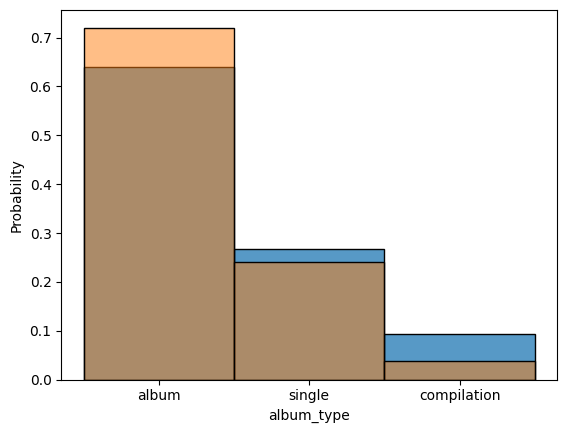

In [8]:
sns.histplot(df[df.isnull().any(axis=1)].album_type, stat="probability")
sns.histplot(df.album_type, stat="probability", alpha=0.5)

**Доля пропущенных строк в датасете составила менее 3%, распределение по категориальному признаку album_type показало, что удаление данных с пропусками существенно не повлияет на общие показатели. Удалим строки с пропусками.**

In [9]:
df = df.dropna()

# 2. Соответствуют ли типы данных в датасете тем, которые нужны (например, есть ли возраст в формате строки)? Исправьте это, если да.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20140 entries, 0 to 20717
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            20140 non-null  object 
 1   track             20140 non-null  object 
 2   album             20140 non-null  object 
 3   album_type        20140 non-null  object 
 4   danceability      20140 non-null  float64
 5   energy            20140 non-null  float64
 6   key               20140 non-null  float64
 7   loudness          20140 non-null  float64
 8   speechiness       20140 non-null  float64
 9   acousticness      20140 non-null  float64
 10  instrumentalness  20140 non-null  float64
 11  liveness          20140 non-null  float64
 12  valence           20140 non-null  float64
 13  tempo             20140 non-null  float64
 14  duration_ms       20140 non-null  float64
 15  stream            20140 non-null  float64
dtypes: float64(12), object(4)
memory usage: 2.6+ 

**Типы данных в датасете соответствуют своим форматам. Для точности можно перевести key, duration_ms и stream из float в int, так как эти переменные не принимают дробных значений. Проверим, действительно ли эти числа на самом деле целые.**

In [11]:
df.query('duration_ms % 1 != 0 or key % 1 != 0 or stream % 1 != 0')[['key', 'duration_ms', 'stream']]

,key,duration_ms,stream


**Проверка показала, что в этих столбцах действительно содержатся целые значения, поэтому их можно привести к целочисленному виду.**

In [12]:
df[['key', 'duration_ms', 'stream']] = df[['key', 'duration_ms', 'stream']].astype(int)
df.sample(5)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
18700,MC Cabelinho,X1,LITTLE HAIR,album,0.579,0.804,8,-5.024,0.0581,0.4570,0.000000,0.1360,0.546,183.075,188852,83628629
6987,Ramon Ayala Y Sus Bravos Del Norte,Para Poder Llegar A Ti,Mi Acordeón Y Yo (Remasterizado),album,0.752,0.726,9,-3.639,0.1090,0.2090,0.000000,0.0525,0.968,168.255,179507,10117084
10498,Plain White T's,"1, 2, 3, 4",Big Bad World,album,0.458,0.550,2,-7.092,0.0262,0.5660,0.000014,0.1080,0.560,90.560,198360,77160530
19278,Xamã,Poesia Acústica 13,Poesia Acústica 13,compilation,0.572,0.579,10,-7.242,0.1280,0.4690,0.000000,0.1360,0.500,127.982,620696,71682526
12231,Gym Class Heroes,The Fighter (feat. Ryan Tedder),The Papercut Chronicles II,album,0.592,0.926,7,-3.469,0.1260,0.0775,0.000000,0.1870,0.432,99.018,228533,75129537


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20140 entries, 0 to 20717
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            20140 non-null  object 
 1   track             20140 non-null  object 
 2   album             20140 non-null  object 
 3   album_type        20140 non-null  object 
 4   danceability      20140 non-null  float64
 5   energy            20140 non-null  float64
 6   key               20140 non-null  int64  
 7   loudness          20140 non-null  float64
 8   speechiness       20140 non-null  float64
 9   acousticness      20140 non-null  float64
 10  instrumentalness  20140 non-null  float64
 11  liveness          20140 non-null  float64
 12  valence           20140 non-null  float64
 13  tempo             20140 non-null  float64
 14  duration_ms       20140 non-null  int64  
 15  stream            20140 non-null  int64  
dtypes: float64(9), int64(3), object(4)
memory usa

# 3. Посчитайте описательные статистики по всем переменным.

**Описательные статистики количественных переменных:**

In [14]:
df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
count,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,2.014000e+04,2.014000e+04
mean,0.620460,0.635153,5.290318,-7.644976,0.095312,0.291900,0.055457,0.192971,0.529521,120.628974,2.244368e+05,1.359430e+08
std,0.165506,0.214007,3.577017,4.633981,0.106977,0.286446,0.192882,0.167876,0.245295,29.601307,1.258144e+05,2.441441e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,6.574000e+03
25%,0.519000,0.507000,2.000000,-8.794000,0.035700,0.045400,0.000000,0.094175,0.339000,96.994000,1.799145e+05,1.767260e+07
50%,0.638000,0.666000,5.000000,-6.515000,0.050600,0.194000,0.000002,0.125000,0.537000,119.965000,2.131850e+05,4.967698e+07
75%,0.741250,0.798000,8.000000,-4.922000,0.104000,0.477000,0.000427,0.236000,0.726000,139.952250,2.520000e+05,1.383525e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,3.386520e+09


**Описательные статистики категориальных переменных:**

In [15]:
df.describe(include='object')

,artist,track,album,album_type
count,20140,20140,20140,20140
unique,2057,17327,11642,3
top,Gorillaz,El Ultimo Adiós - Varios Artistas Version,Hamilton (Original Broadway Cast Recording),album
freq,10,24,29,14556


# 4. Изучите каждый признак. Какие значения он принимает?

**Выведем минимальные и максимальные значения для числовых переменных:**

In [16]:
df.describe().loc[['max', 'min']]

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
max,0.975,1.00000,11.0,0.920,0.964,0.996000,1.0,1.0000,0.993,243.372,4676058.0,3.386520e+09
min,0.000,0.00002,0.0,-46.251,0.000,0.000001,0.0,0.0145,0.000,0.000,30985.0,6.574000e+03


**Признаки denceability, energy, speechiness, acousticness, instrumentalness, liveness, valence принимают значения от 0 до 1, являющееся оценкой соответствия данным характеристикам.**

denceability - значения близкие к нулю соответствуют записям белого шума и инструментальным трекам практически без низких частот. Максимальные значения принадлежат танцевальным трекам, предположительно жанрам поп, хаус, техно.

energy - значения близкие к нулю соответствуют неэнергичным композициям, близкие к 1 - наоборот.

speechiness - близкие к 0 значения соответствуют белому шуму, близкие к 1 - аудиокнигам.

acousticness - близкие к 0 значения соответствуют трекам без живого инструментала, близкие к 1 - по большей части состоящие из записи живых инструментов.

instrumentalness - близкие к 0 значения принадлежат трекам по большей части состоящих из электронных звуков, а близкие к 1 - исключительно из живых инструментов.

liveness - близкие к 0 значения - студийные записи, близкие к 1 - записи концертов.

valence - близкие к 0 значения - треки с негативным характером. Близкие к 1 - с позитивным.

**Другие числовые признаки:**

key - корневая нота трека, музыкальная тональность от 0 (нота 'до') до 11 (нота 'си')

loudness - громкость трека в децибелах. Чем больше значение, тем громче трек. Наиболее низкие значения соответствуют белому шуму и классической музыке, наиболее высокие - поп и танцевальной музыке.

tempo - темп трека в ударах в минуту. Значения 0 принимают аудиокниги и треки без ритм-секции.

duration_ms - минимальное значение - 30 секунд, максимальное - 1,3 часа.Минимальные значения соответствуют коротким трекам, например вступлениям к сериалам. Максимальные значения соответствуют ремиксам, записанным единым треком и некоторым классическим произведениям.

stream - количество прослушиваний трека. Чем больше значение, тем больше прослушиваний.

**Категориальные признаки:**

artist - 2 057 уникальных значений, псевдонимы артистов

track - 17 327 уникальных значений, названия композиций

album - 11 642 уникальных значений, названий альбомов

album_type - 3 уникальных значения, тип альбома (album, single, compilation)

**Проверка danceability == 0. В получившемся датафрейме видно, что по большей части этому значению соответствуют записи белого шума для сна:**

In [17]:
df[df.danceability == 0]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
2073,Louis Armstrong,"Hello, Dolly!","Hello, Dolly! (Remastered)",album,0.0,0.405000,0,-9.935,0.0,0.84200,0.00114,0.1980,0.0,0.0,147000,22358910
2871,The Alchemist,Arrival,Israeli Salad,album,0.0,0.802000,1,-7.977,0.0,0.00417,0.87800,0.6030,0.0,0.0,94967,9283211
7187,Luciano Pavarotti,"Rigoletto / Act 3: ""La donna è mobile"" - Live",The Three Tenors - The Best of the 3 Tenors,compilation,0.0,0.402000,5,-15.718,0.0,0.97200,0.00545,0.8970,0.0,0.0,151253,1995393
8373,M83,Adieux,You And The Night,album,0.0,0.105000,7,-13.925,0.0,0.98900,0.95700,0.1080,0.0,0.0,64840,3387203
9266,Lang Lang,The Departure,Voyager - Essential Max Richter,album,0.0,0.036200,0,-22.519,0.0,0.99400,0.94000,0.0958,0.0,0.0,151507,11902123
9348,Ocean Sounds,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0,0.000252,9,-17.746,0.0,0.00948,0.87700,0.8060,0.0,0.0,93452,54256600
9358,Ocean Waves For Sleep,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0,0.000252,9,-17.746,0.0,0.00948,0.87700,0.8060,0.0,0.0,93452,54256600
13839,White Noise for Babies,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.003420,8,-28.460,0.0,0.79100,1.00000,0.1110,0.0,0.0,90228,956435715
13840,White Noise for Babies,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.001250,1,-27.592,0.0,0.90800,1.00000,0.1110,0.0,0.0,72223,128701242
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.000055,10,-21.995,0.0,0.92100,1.00000,0.1140,0.0,0.0,108527,26677287


**Проверка min и max значений duration_ms:**

In [18]:
df.sort_values('duration_ms', ascending=False)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
10475,Harshdeep Kaur,High Rated Gabru 52 Non Stop Hits(Remix By Man...,High Rated Gabru 52 Non Stop Hits,compilation,0.385,0.935,2,-2.545,0.2590,0.0843,0.000000,0.6780,0.5570,180.793,4676058,12498196
4926,Himesh Reshammiya,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,52 Non Stop Dilbar Dilbar Remix,compilation,0.521,0.837,7,-4.501,0.0794,0.0593,0.000013,0.1570,0.4800,106.001,4581483,23128326
7383,Divya Kumar,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,52 Non Stop Dilbar Dilbar Remix,compilation,0.521,0.837,7,-4.501,0.0794,0.0593,0.000013,0.1570,0.4800,106.001,4581483,23128326
2983,Amaal Mallik,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,52 Non Stop Dilbar Dilbar Remix,compilation,0.521,0.837,7,-4.501,0.0794,0.0593,0.000013,0.1570,0.4800,106.001,4581483,23128326
9865,Tulsi Kumar,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,52 Non Stop Dilbar Dilbar Remix,compilation,0.521,0.837,7,-4.501,0.0794,0.0593,0.000013,0.1570,0.4800,106.001,4581483,23128326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20650,Sleepy Penguin,Magic Piano and White Noise,White Noise Calming Piano Melodies,album,0.407,0.998,9,-22.451,0.0709,0.9590,0.013100,0.7050,0.0144,79.555,31000,2072699
20649,Sleepy Penguin,Bedtime White Noise and Piano Tunes,White Noise Calming Piano Melodies,album,0.183,0.997,0,-25.191,0.0897,0.9400,0.001860,0.1740,0.0000,82.178,31000,2125928
20648,Sleepy Penguin,Peacefull Paino and White Noise,White Noise Calming Piano Melodies,album,0.284,0.998,1,-24.972,0.0433,0.5850,0.000029,0.3770,0.0000,82.094,31000,2128592
20646,Sleepy Penguin,Relaxing Baby White Noise Piano,White Noise Calming Piano Melodies,album,0.405,0.998,0,-22.010,0.1740,0.8730,0.000000,0.1560,0.0000,82.660,31000,2670893


In [19]:
df.sort_values('speechiness', ascending=False)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
5158,Sir Arthur Conan Doyle,Teil 7 - Sherlock Holmes und der blinde Bettle...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.625,0.257000,1,-15.375,0.964,0.115,0.000,0.2830,0.349,170.970,180202,10540
5152,Sir Arthur Conan Doyle,Teil 1 - Sherlock Holmes und die Geheimwaffe -...,Sherlock Holmes und die Geheimwaffe [Sherlock ...,album,0.641,0.286000,3,-14.945,0.962,0.177,0.000,0.3710,0.487,85.538,92378,12567
994,Bibi Blocksberg,Kapitel 11: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.694,0.200000,5,-18.887,0.961,0.792,0.000,0.6630,0.463,139.380,93900,283140
996,Bibi Blocksberg,Kapitel 09: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.649,0.257000,1,-21.931,0.961,0.777,0.000,0.3580,0.632,90.661,94425,282266
13418,Sherlock Holmes,Teil 14 - Fall 53: Die sieben Zinnsoldaten,"Die neuen Fälle, Fall 53: Die sieben Zinnsoldaten",album,0.664,0.682000,8,-11.758,0.960,0.523,0.000,0.1830,0.475,79.168,201187,102383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266,Lang Lang,The Departure,Voyager - Essential Max Richter,album,0.000,0.036200,0,-22.519,0.000,0.994,0.940,0.0958,0.000,0.000,151507,11902123
13839,White Noise for Babies,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.000,0.003420,8,-28.460,0.000,0.791,1.000,0.1110,0.000,0.000,90228,956435715
13840,White Noise for Babies,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.000,0.001250,1,-27.592,0.000,0.908,1.000,0.1110,0.000,0.000,72223,128701242
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.000,0.000055,10,-21.995,0.000,0.921,1.000,0.1140,0.000,0.000,108527,26677287


In [20]:
df.sort_values('acousticness', ascending=False)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
9780,Max Richter,The Departure,The Leftovers: Season 1 (Music from the HBO Se...,album,0.3840,0.00341,0,-39.053,0.0447,0.996000,0.9430,0.0964,0.11700,116.941,75849,86888037
6297,Edvard Grieg,"Lyric Pieces Book I, Op. 12: No. 1 Arietta",Grieg: Lyric Pieces,album,0.4450,0.00325,3,-41.001,0.0581,0.996000,0.9610,0.0698,0.37300,129.794,87000,2176763
14941,C418,Wet Hands,Minecraft - Volume Alpha,album,0.6160,0.03500,9,-25.836,0.0432,0.996000,0.9390,0.0835,0.64300,147.712,90000,55009250
2757,Pyotr Ilyich Tchaikovsky,"Album for the Young, Op. 39: No. 3. Mamma (Maman)","Piano Recital: Rosenberger, Carol - Kabalevsky...",album,0.4180,0.00869,7,-37.257,0.0455,0.996000,0.9620,0.1050,0.42000,87.273,93507,20909481
4060,Erik Satie,3 Gymnopédies: No. 1 Lent et douloureux,Satie: The Magic of Satie,album,0.5900,0.00399,7,-36.497,0.2420,0.996000,0.9460,0.0683,0.18200,74.381,219760,12716957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Gojira,Silvera,Magma,album,0.3330,0.95900,2,-4.348,0.0720,0.000003,0.0563,0.2990,0.24200,137.052,212653,48379836
6017,Gojira,The Heaviest Matter of the Universe,From Mars to Sirius,album,0.2430,0.97000,5,-2.518,0.0878,0.000003,0.0415,0.2840,0.24300,102.729,237840,16820162
5162,In Flames,Only for the Weak,Clayman,album,0.4180,0.83500,0,-4.824,0.0449,0.000002,0.7660,0.2890,0.54900,104.986,294867,78929442
12186,Volbeat,Becoming,Servant Of The Mind (Deluxe),album,0.4320,0.94100,7,-6.581,0.0591,0.000002,0.0439,0.3200,0.39300,120.025,253347,12977029


In [21]:
df.sort_values('loudness', ascending=False)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
9423,Sub Focus,Siren,Solar System / Siren,single,0.486,0.98600,5,0.920,0.0620,0.118,0.68400,0.2190,0.2410,173.983,256000,14126273
18354,Montell Fish,Exscape,Her Love Still Haunts Me Like a Ghost,album,0.599,0.85400,4,0.829,0.0373,0.648,0.00000,0.0980,0.4490,139.995,142286,7762624
15187,Shilpi Raj,Le Le Aayi Coca Cola,Le Le Aayi Coca Cola,single,0.716,0.96200,5,0.561,0.1010,0.357,0.00001,0.1890,0.8570,114.993,277569,3667356
10578,"Sergio Vega ""El Shaka""",Me Gusta Estar Contigo,Me Gusta Estar Contigo,album,0.888,0.74100,5,0.522,0.0573,0.495,0.00000,0.0533,0.9680,105.789,138467,25302700
12543,French Montana,Welcome to the Party (with French Montana & Li...,Welcome to the Party (with French Montana & Li...,single,0.618,0.84500,2,0.175,0.1320,0.114,0.00000,0.4150,0.4860,171.921,181720,238992070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,C418,Key,Minecraft - Volume Alpha,album,0.129,0.00376,3,-41.766,0.0379,0.993,0.38200,0.0774,0.0376,147.148,65000,45523766
5356,Robert Schumann,"Kinderszenen, Op. 15: 1. Von fremden Ländern u...",Schumann: Kinderszenen; Kreisleriana,album,0.282,0.00199,7,-41.932,0.0515,0.996,0.91400,0.0625,0.3240,127.892,113240,9719644
7124,Claudio Abbado,"The Nutcracker Suite, Op. 71a, TH 35: IIb. Dan...",Tchaikovsky: Complete Symphonies; 1812 Overtur...,album,0.196,0.00262,4,-43.988,0.0349,0.876,0.04270,0.1270,0.1170,115.546,110000,8170111
4057,Erik Satie,Enfantillages pittoresques: II. Berceuse,"Satie: Complete Piano Works, Vol. 2/2",album,0.440,0.00217,9,-44.761,0.0530,0.987,0.95800,0.0731,0.4730,126.920,77267,20452217


# 5. Есть ли в данных выбросы или ошибки (например, отрицательная цена)? Как вы их определяете? Обработайте выбросы.

**Судя по предыдущему этапу выполнения EDA, явных ошибок в данных нет. На первый взгляд может показаться, что нулевые значения темпа или коэффициентов указывают на ошибки, но при детальном рассмотрении эти данные поддаются логическому объяснению. Обнаружим выбросы с помощью графиков "ящик с усами":**

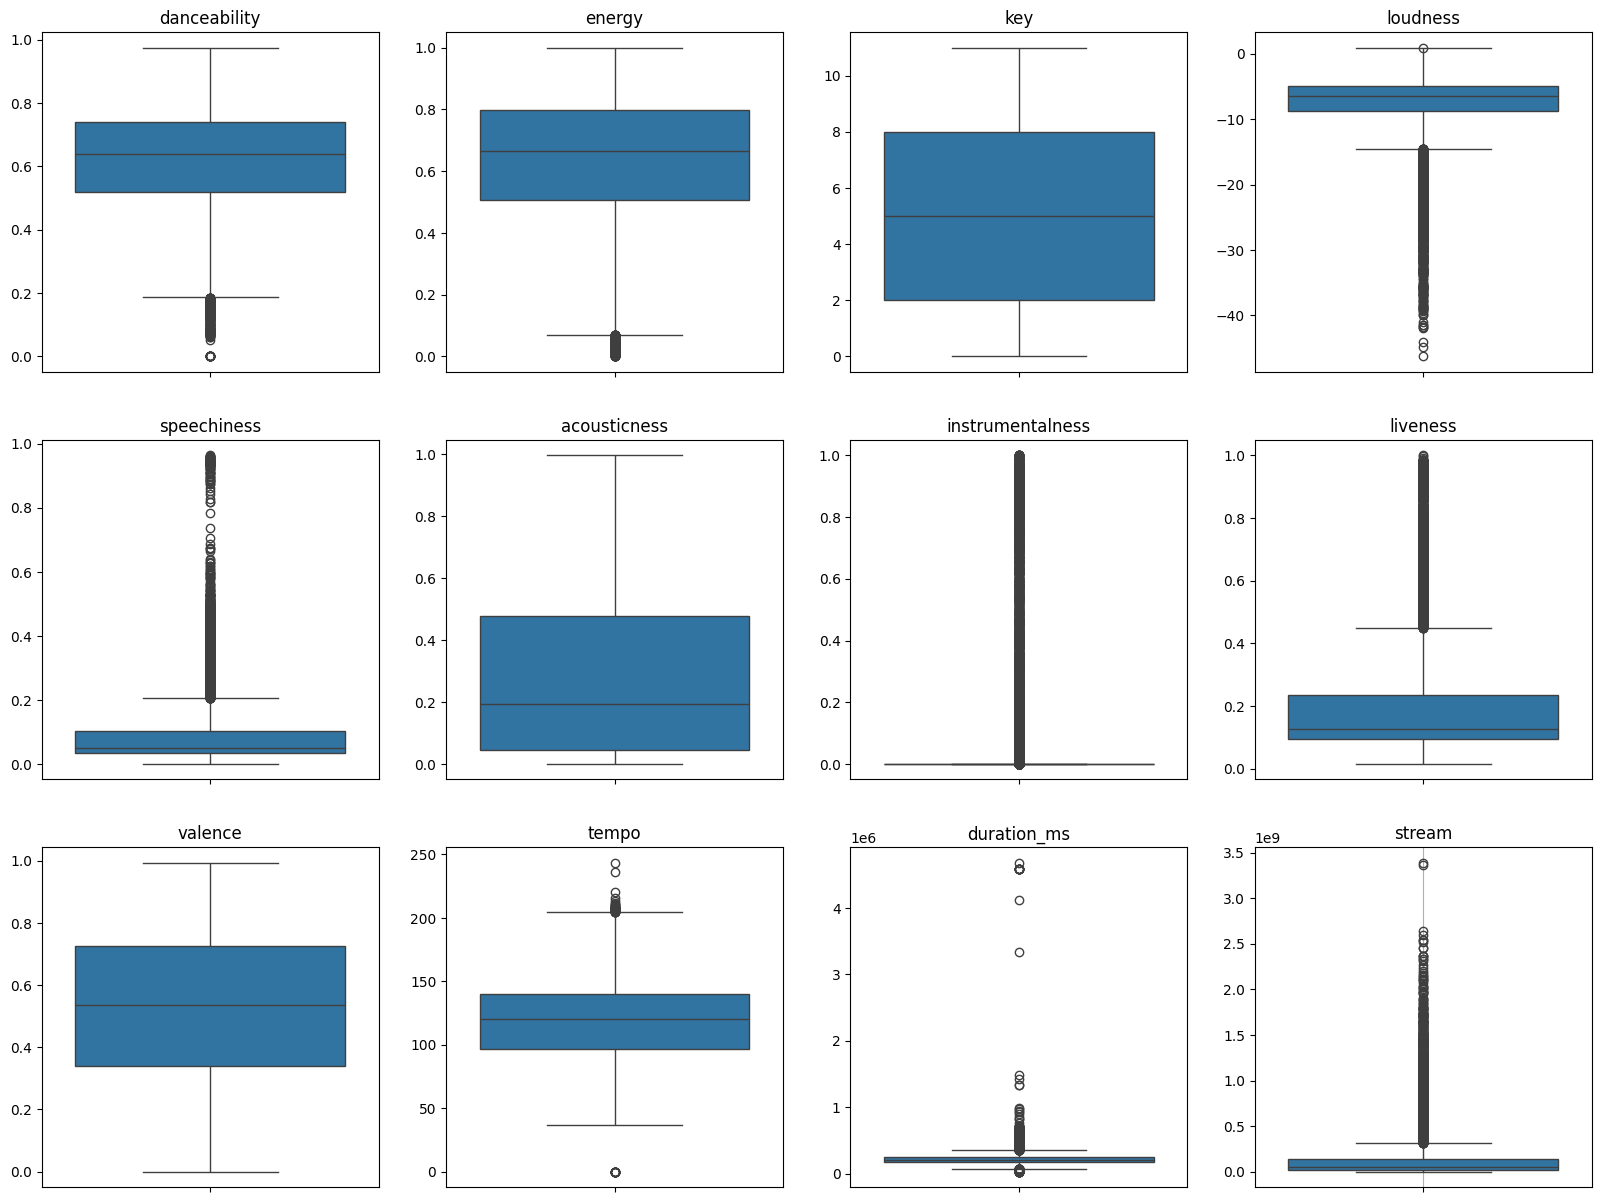

In [22]:
numeric_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'stream']

def show_boxplots():
    fig, (axes) = plt.subplots(3, 4, figsize = (20, 15))

    for i in range(12):
        sns.boxplot(data=df, y=numeric_columns[i], ax=axes[i // 4][i % 4])
        axes[i // 4][i % 4].set_title(numeric_columns[i])
        axes[i // 4][i % 4].set_ylabel("")
        plt.grid()

show_boxplots()

**Наиболее яркие выбросы прослеживаются в признаке "Instrumentalness". На боксплоте видно, что подавляющее большинство значений находятся в области, очень близкой к 0. Проверим, что это за треки:**

In [23]:
df[df.instrumentalness <= 0.01].sort_values('instrumentalness')

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
10837,Kany García,Soy Mia,Iluminatti,album,0.757,0.8380,0,-3.579,0.0285,0.281000,0.00000,0.3310,0.916,140.008,221773,44497070
12779,Leona Lewis,Bleeding Love,Spirit,album,0.638,0.6560,5,-5.886,0.0357,0.188000,0.00000,0.1460,0.225,104.036,262467,701115109
12780,Leona Lewis,One More Sleep,"Christmas, With Love",album,0.638,0.8130,11,-3.849,0.0362,0.464000,0.00000,0.3440,0.754,112.986,239587,173911775
12781,Leona Lewis,You Are The Reason - Duet Version,Only Human (Special Edition),album,0.403,0.3560,10,-7.547,0.0298,0.382000,0.00000,0.1480,0.151,171.454,190760,206655633
12785,Leona Lewis,I See You (Theme from Avatar),AVATAR Music From The Motion Picture Music Com...,compilation,0.399,0.2520,10,-17.083,0.0377,0.527000,0.00000,0.1260,0.173,136.018,260693,7062868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14984,Christina Perri,here comes the sun,songs for rosie,album,0.699,0.0757,2,-13.588,0.0353,0.985000,0.00991,0.1130,0.472,106.930,167293,9688003
10525,Robin Thicke,Wanna Love You Girl - Main,The Evolution of Robin Thicke,album,0.902,0.3580,9,-9.032,0.1500,0.028500,0.00992,0.0917,0.773,116.025,263280,13407291
17823,Smino,Louphoria (with Cruza),Luv 4 Rent,album,0.513,0.4440,0,-10.587,0.1030,0.707000,0.00992,0.4840,0.165,118.861,226258,3215019
7637,Killswitch Engage,My Curse,As Daylight Dies (Special Edition),album,0.197,0.9560,10,-2.908,0.0663,0.000076,0.00992,0.2610,0.209,177.018,244773,169592755


**Данные показали, что из 20140 треков в датасете 17285 имеют признак instrumentalness <= 0.01, что составляет около 86% всех значений. Следует оценить, у каких треков признак instrumentalness > 0.01.**

In [24]:
df[df.instrumentalness > 0.01].sort_values('instrumentalness')

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
12539,French Montana,Unforgettable,Jungle Rules,album,0.726,0.769000,6,-5.043,0.1230,0.029300,0.0101,0.1040,0.733,97.985,233902,1595733286
552,Aerosmith,Cryin',Get A Grip,album,0.445,0.856000,9,-3.674,0.0327,0.000202,0.0101,0.3670,0.486,105.872,308333,233440383
13718,Ryan Lewis,St. Ides,This Unruly Mess I've Made,album,0.812,0.524000,2,-10.549,0.0656,0.617000,0.0101,0.1060,0.043,107.710,219107,17336475
15043,Shouse,Love Tonight,Love Tonight,single,0.796,0.552000,0,-7.226,0.0314,0.001130,0.0101,0.0876,0.468,123.004,493796,83220667
5383,Playero,DEJAU',SATURNO,album,0.807,0.812000,5,-2.115,0.0507,0.078200,0.0101,0.4330,0.567,107.022,182836,24207724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15597,White Noise Baby Sleep,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.000,0.000055,10,-21.995,0.0000,0.921000,1.0000,0.1140,0.000,0.000,108527,26677287
13840,White Noise for Babies,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.000,0.001250,1,-27.592,0.0000,0.908000,1.0000,0.1110,0.000,0.000,72223,128701242
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.000,0.000055,10,-21.995,0.0000,0.921000,1.0000,0.1140,0.000,0.000,108527,26677287
13848,White Noise for Babies,"Clean White Noise - Loopable, No Fade",Relaxing Loopable White Noise,single,0.000,0.003420,8,-28.460,0.0000,0.791000,1.0000,0.1110,0.000,0.000,90228,26018007


**Видим, что в датасете встречаются несколько треков артистов "White Noise". Белый шум - это не музыка, он не соотносится с нашим проектом. К тому же, по непонятным причинам, этим трекам дана высшая оценка instrumentalness, что нелогично. Уберём эти треки.**

In [25]:
df[df['artist'].str.lower().str.contains('white noise')]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
13839,White Noise for Babies,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0000,0.003420,8,-28.460,0.0000,0.791000,1.000,0.1110,0.00000,0.000,90228,956435715
13840,White Noise for Babies,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0000,0.001250,1,-27.592,0.0000,0.908000,1.000,0.1110,0.00000,0.000,72223,128701242
13841,White Noise for Babies,Pouring Rain In Storm - Loopable Without Fade,White Noise,album,0.1880,0.158000,1,-38.642,0.1230,0.895000,0.522,0.1120,0.08970,74.755,100001,32027753
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0000,0.000055,10,-21.995,0.0000,0.921000,1.000,0.1140,0.00000,0.000,108527,26677287
13844,White Noise for Babies,Shower Sound - Loopable Without Fade,White Noise,album,0.0000,0.251000,2,-25.004,0.0000,0.119000,0.913,0.3840,0.00000,0.000,62850,48053292
13845,White Noise for Babies,"Soothing White Noise - Loopable, No Fade",White Noise,album,0.0000,0.001250,1,-27.592,0.0000,0.908000,1.000,0.1110,0.00000,0.000,72223,71571206
13846,White Noise for Babies,Womb Sound - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0731,0.273000,1,-36.766,0.0955,0.772000,0.868,0.1120,0.03570,177.756,56223,21907443
13847,White Noise for Babies,Cricket Sound 4 - Loopable With No Fade,Cricket Sounds,album,0.4610,0.003250,10,-46.251,0.0639,0.915000,0.862,0.0594,0.07280,111.653,71000,9390850
13848,White Noise for Babies,"Clean White Noise - Loopable, No Fade",Relaxing Loopable White Noise,single,0.0000,0.003420,8,-28.460,0.0000,0.791000,1.000,0.1110,0.00000,0.000,90228,26018007
15588,White Noise Baby Sleep,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0000,0.003420,8,-28.460,0.0000,0.791000,1.000,0.1110,0.00000,0.000,90228,956435715


In [26]:
df = df.drop(df[df['artist'].str.lower().str.contains('white noise')].index)
df = df.drop(df[df['track'].str.lower().str.contains('white noise')].index)

**Вспомним, что на предыдущем этапе нам встречались аудиокниги, в частности Артура Конан Дойля. Поступим с ними так же, как с белым шумом.**

In [27]:
df[df.artist.str.lower().str.contains('arthur conan doyle')]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
5152,Sir Arthur Conan Doyle,Teil 1 - Sherlock Holmes und die Geheimwaffe -...,Sherlock Holmes und die Geheimwaffe [Sherlock ...,album,0.641,0.286,3,-14.945,0.962,0.1770,0.0,0.371,0.487,85.538,92378,12567
5153,Sir Arthur Conan Doyle,Teil 10 - Sherlock Holmes und der blinde Bettl...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.761,0.323,6,-14.367,0.940,0.0977,0.0,0.115,0.574,116.039,180317,11062
5154,Sir Arthur Conan Doyle,Teil 9 - Sherlock Holmes und der blinde Bettle...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.690,0.354,1,-13.606,0.949,0.1030,0.0,0.147,0.315,101.851,181942,10798
5155,Sir Arthur Conan Doyle,Teil 6 - Sherlock Holmes und der blinde Bettle...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.688,0.268,11,-16.410,0.951,0.1640,0.0,0.137,0.425,73.074,180130,10710
5156,Sir Arthur Conan Doyle,Teil 8 - Sherlock Holmes und der blinde Bettle...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.711,0.297,11,-16.526,0.953,0.1180,0.0,0.205,0.300,126.042,184898,10701
5157,Sir Arthur Conan Doyle,Teil 11 - Sherlock Holmes und der blinde Bettl...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.713,0.307,2,-15.739,0.940,0.2400,0.0,0.278,0.372,125.724,182349,10660
5158,Sir Arthur Conan Doyle,Teil 7 - Sherlock Holmes und der blinde Bettle...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.625,0.257,1,-15.375,0.964,0.1150,0.0,0.283,0.349,170.970,180202,10540
5159,Sir Arthur Conan Doyle,Teil 5 - Sherlock Holmes und der blinde Bettle...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.675,0.323,2,-15.074,0.959,0.0907,0.0,0.225,0.436,145.349,181574,10306
5160,Sir Arthur Conan Doyle,Teil 10 - Sherlock Holmes und ein Brief von de...,Sherlock Holmes und ein Brief von der Titanic ...,album,0.716,0.316,11,-18.809,0.945,0.4470,0.0,0.267,0.442,118.596,181431,8074
5161,Sir Arthur Conan Doyle,Teil 9 - Sherlock Holmes und ein Brief von der...,Sherlock Holmes und ein Brief von der Titanic ...,album,0.674,0.316,1,-19.952,0.960,0.3350,0.0,0.269,0.389,79.324,184499,8053


In [28]:
df = df.drop(df[df.artist.str.lower().str.contains('arthur conan doyle')].index)

**Аудиокнигам принадлежит очень высокий показатель speechiness. На примере аудиокниг Артура Конан Дойля видно, что он > 0.9. Посмотрим, что ещё за треки с такой характеристикой встречаются в датасете.**

In [29]:
df[df.speechiness >= 0.9].sort_values('speechiness', ascending=False)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
994,Bibi Blocksberg,Kapitel 11: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.694,0.200,5,-18.887,0.961,0.7920,0.000000,0.6630,0.463,139.380,93900,283140
996,Bibi Blocksberg,Kapitel 09: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.649,0.257,1,-21.931,0.961,0.7770,0.000000,0.3580,0.632,90.661,94425,282266
13418,Sherlock Holmes,Teil 14 - Fall 53: Die sieben Zinnsoldaten,"Die neuen Fälle, Fall 53: Die sieben Zinnsoldaten",album,0.664,0.682,8,-11.758,0.960,0.5230,0.000000,0.1830,0.475,79.168,201187,102383
3965,Fünf Freunde,152 - und das Geheimnis der Kelly Brüder - Tei...,Folge 152: und das Geheimnis der Kelly Brüder,album,0.644,0.326,1,-19.431,0.959,0.5190,0.000000,0.4830,0.485,63.313,183000,40340
13410,Sherlock Holmes,Teil 1 - Fall 53: Die sieben Zinnsoldaten,"Die neuen Fälle, Fall 53: Die sieben Zinnsoldaten",album,0.538,0.804,8,-10.327,0.956,0.5890,0.000000,0.7080,0.314,172.743,200093,102172
1992,Benjamin Blümchen,Kapitel 03: Das große Gewitter (Folge 153),Folge 153: Das große Gewitter,album,0.612,0.485,5,-15.670,0.954,0.1540,0.000000,0.3080,0.623,69.149,94370,67348
13413,Sherlock Holmes,Teil 9 - Fall 53: Die sieben Zinnsoldaten,"Die neuen Fälle, Fall 53: Die sieben Zinnsoldaten",album,0.620,0.578,6,-10.976,0.951,0.3050,0.000000,0.2130,0.644,79.396,195000,105454
997,Bibi Blocksberg,Kapitel 06: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.722,0.218,6,-19.565,0.950,0.7430,0.000000,0.5870,0.547,115.687,91622,282204
991,Bibi Blocksberg,Kapitel 15: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.686,0.292,10,-19.942,0.949,0.6690,0.000000,0.5340,0.687,77.526,93110,287594
13415,Sherlock Holmes,Teil 6 - Fall 53: Die sieben Zinnsoldaten,"Die neuen Fälle, Fall 53: Die sieben Zinnsoldaten",album,0.699,0.595,1,-11.011,0.948,0.3140,0.000000,0.3650,0.593,84.856,194640,103420


**Заметим, что практически во всех названиях треков которые мы увидели есть слова teil, kapitel, folge. По-немецки это означает "часть", "глава" и "эпизод". Это прямым образом указывает на то, что треки, в названиях которых встречаются эти слова являются скорее аудиокнигами и подкастами на немецком языке, чем музыкальными произведениями. Убираем их из датасета.**

In [30]:
df[df['track'].str.lower().str.contains('teil') | df['track'].str.lower().str.contains('kapitel') | df['track'].str.lower().str.contains('folge')]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
988,Bibi Blocksberg,Kapitel 13: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.719,0.435,9,-18.359,0.922,0.557,0.0,0.5310,0.421,117.240,92971,290437
989,Bibi Blocksberg,Kapitel 12: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.701,0.319,6,-18.703,0.939,0.614,0.0,0.2830,0.767,136.412,96843,288028
990,Bibi Blocksberg,Kapitel 10: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.640,0.501,5,-17.636,0.947,0.772,0.0,0.4640,0.413,121.666,95569,289895
991,Bibi Blocksberg,Kapitel 15: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.686,0.292,10,-19.942,0.949,0.669,0.0,0.5340,0.687,77.526,93110,287594
992,Bibi Blocksberg,Kapitel 17: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.563,0.430,2,-19.468,0.944,0.586,0.0,0.0889,0.391,85.700,96057,286696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14205,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 08,Folge 81: Geheimnis im Spukhotel,album,0.736,0.646,10,-11.376,0.929,0.483,0.0,0.6040,0.604,89.647,181320,312787
14206,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 07,Folge 81: Geheimnis im Spukhotel,album,0.619,0.616,5,-10.500,0.897,0.390,0.0,0.1780,0.555,51.136,181280,311087
14207,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 09,Folge 81: Geheimnis im Spukhotel,album,0.580,0.431,10,-13.425,0.450,0.322,0.0,0.4600,0.325,84.214,180467,312052
14208,Die drei !!!,81 - Geheimnis im Spukhotel - Teil 10,Folge 81: Geheimnis im Spukhotel,album,0.720,0.483,10,-12.987,0.932,0.321,0.0,0.6290,0.536,78.449,180813,310515


In [31]:
df = df.drop(df[df['track'].str.lower().str.contains('teil') | df['track'].str.lower().str.contains('kapitel') | df['track'].str.lower().str.contains('folge')].index)

**Посмотрим на треки с самыми низкими значениями danceability:**

In [32]:
df.sort_values('danceability').head(20)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
9358,Ocean Waves For Sleep,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0000,0.000252,9,-17.746,0.0000,0.00948,0.87700,0.8060,0.00000,0.000,93452,54256600
7187,Luciano Pavarotti,"Rigoletto / Act 3: ""La donna è mobile"" - Live",The Three Tenors - The Best of the 3 Tenors,compilation,0.0000,0.402000,5,-15.718,0.0000,0.97200,0.00545,0.8970,0.00000,0.000,151253,1995393
2871,The Alchemist,Arrival,Israeli Salad,album,0.0000,0.802000,1,-7.977,0.0000,0.00417,0.87800,0.6030,0.00000,0.000,94967,9283211
8373,M83,Adieux,You And The Night,album,0.0000,0.105000,7,-13.925,0.0000,0.98900,0.95700,0.1080,0.00000,0.000,64840,3387203
9348,Ocean Sounds,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0000,0.000252,9,-17.746,0.0000,0.00948,0.87700,0.8060,0.00000,0.000,93452,54256600
2073,Louis Armstrong,"Hello, Dolly!","Hello, Dolly! (Remastered)",album,0.0000,0.405000,0,-9.935,0.0000,0.84200,0.00114,0.1980,0.00000,0.000,147000,22358910
9266,Lang Lang,The Departure,Voyager - Essential Max Richter,album,0.0000,0.036200,0,-22.519,0.0000,0.99400,0.94000,0.0958,0.00000,0.000,151507,11902123
10192,Jeremy Soule,Far Horizons,The Elder Scrolls V: Skyrim: Original Game Sou...,album,0.0619,0.172000,10,-20.773,0.0404,0.93700,0.95200,0.1700,0.04420,65.409,331476,17183261
4788,Howard Shore,Many Meetings,The Lord of the Rings: The Fellowship of the R...,compilation,0.0623,0.100000,0,-20.607,0.0459,0.98200,0.93400,0.1160,0.03590,64.791,185427,19786877
4593,Sir Simon Rattle,Barber: Adagio for Strings,Barber: Adagio for Strings,single,0.0640,0.073500,10,-24.133,0.0540,0.97400,0.86100,0.2800,0.03060,72.616,537427,24001841


In [33]:
df[df.track.str.lower().str.contains('sounds')]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
6564,Alphaville,Sounds Like a Melody - 2019 Remaster,Forever Young (Super Deluxe Edition; 2019 Rema...,album,0.700,0.802,11,-6.966,0.0370,0.0422,0.170000,0.239,0.44500,97.189,286170,38194418
6566,Alphaville,Sounds Like a Melody,First Harvest 1984-1992,compilation,0.650,0.872,7,-8.534,0.0414,0.1230,0.000185,0.255,0.60300,97.436,267907,10613291
9347,Ocean Sounds,Calm Sea Sounds,Loopable Ocean Sounds For Sleep,album,0.171,0.995,3,-24.270,0.0438,0.7730,0.989000,0.967,0.00001,48.190,119000,26550234
9350,Ocean Sounds,Ocean Sounds For Deep Sleep,Baby Sleep: Ocean Sounds,album,0.150,0.984,3,-19.366,0.0584,0.8360,0.986000,0.947,0.00001,80.756,143250,11578423
9354,Ocean Sounds,Sleepy Sea Sounds,Baby Sleep: Ocean Sounds,album,0.163,0.996,2,-14.608,0.0609,0.4730,0.969000,0.859,0.00001,112.953,160500,8072713
9355,Ocean Sounds,Beach Sounds,Relaxing Beach Sounds,album,0.114,0.663,9,-27.070,0.0836,0.3450,0.592000,0.750,0.01530,94.197,231993,2595488
9357,Ocean Waves For Sleep,Calm Sea Sounds,Loopable Ocean Sounds For Sleep,album,0.171,0.995,3,-24.270,0.0438,0.7730,0.989000,0.967,0.00001,48.190,119000,26550234
9360,Ocean Waves For Sleep,Ocean Sounds For Deep Sleep,Baby Sleep: Ocean Sounds,album,0.150,0.984,3,-19.366,0.0584,0.8360,0.986000,0.947,0.00001,80.756,143250,11578423
9364,Ocean Waves For Sleep,Sleepy Sea Sounds,Baby Sleep: Ocean Sounds,album,0.163,0.996,2,-14.608,0.0609,0.4730,0.969000,0.859,0.00001,112.953,160500,8072713
19688,Lil Tjay,Sex Sounds,True 2 Myself,album,0.857,0.427,8,-8.638,0.1120,0.2810,0.000000,0.108,0.36600,130.033,162453,265912313


Видим, что треки со словом sounds принадлежат исполннителям Ocean Sounds и Ocean Waves for Sleep, что также не является музыкой. Удаляем их из датасета.

In [34]:
df = df.drop(df[df.artist.str.contains('Ocean Sounds') | df.artist.str.contains('Ocean Waves for Sleep')].index)

**Посмотрим ещё раз на боксплоты после первичной очистки выбросов:**

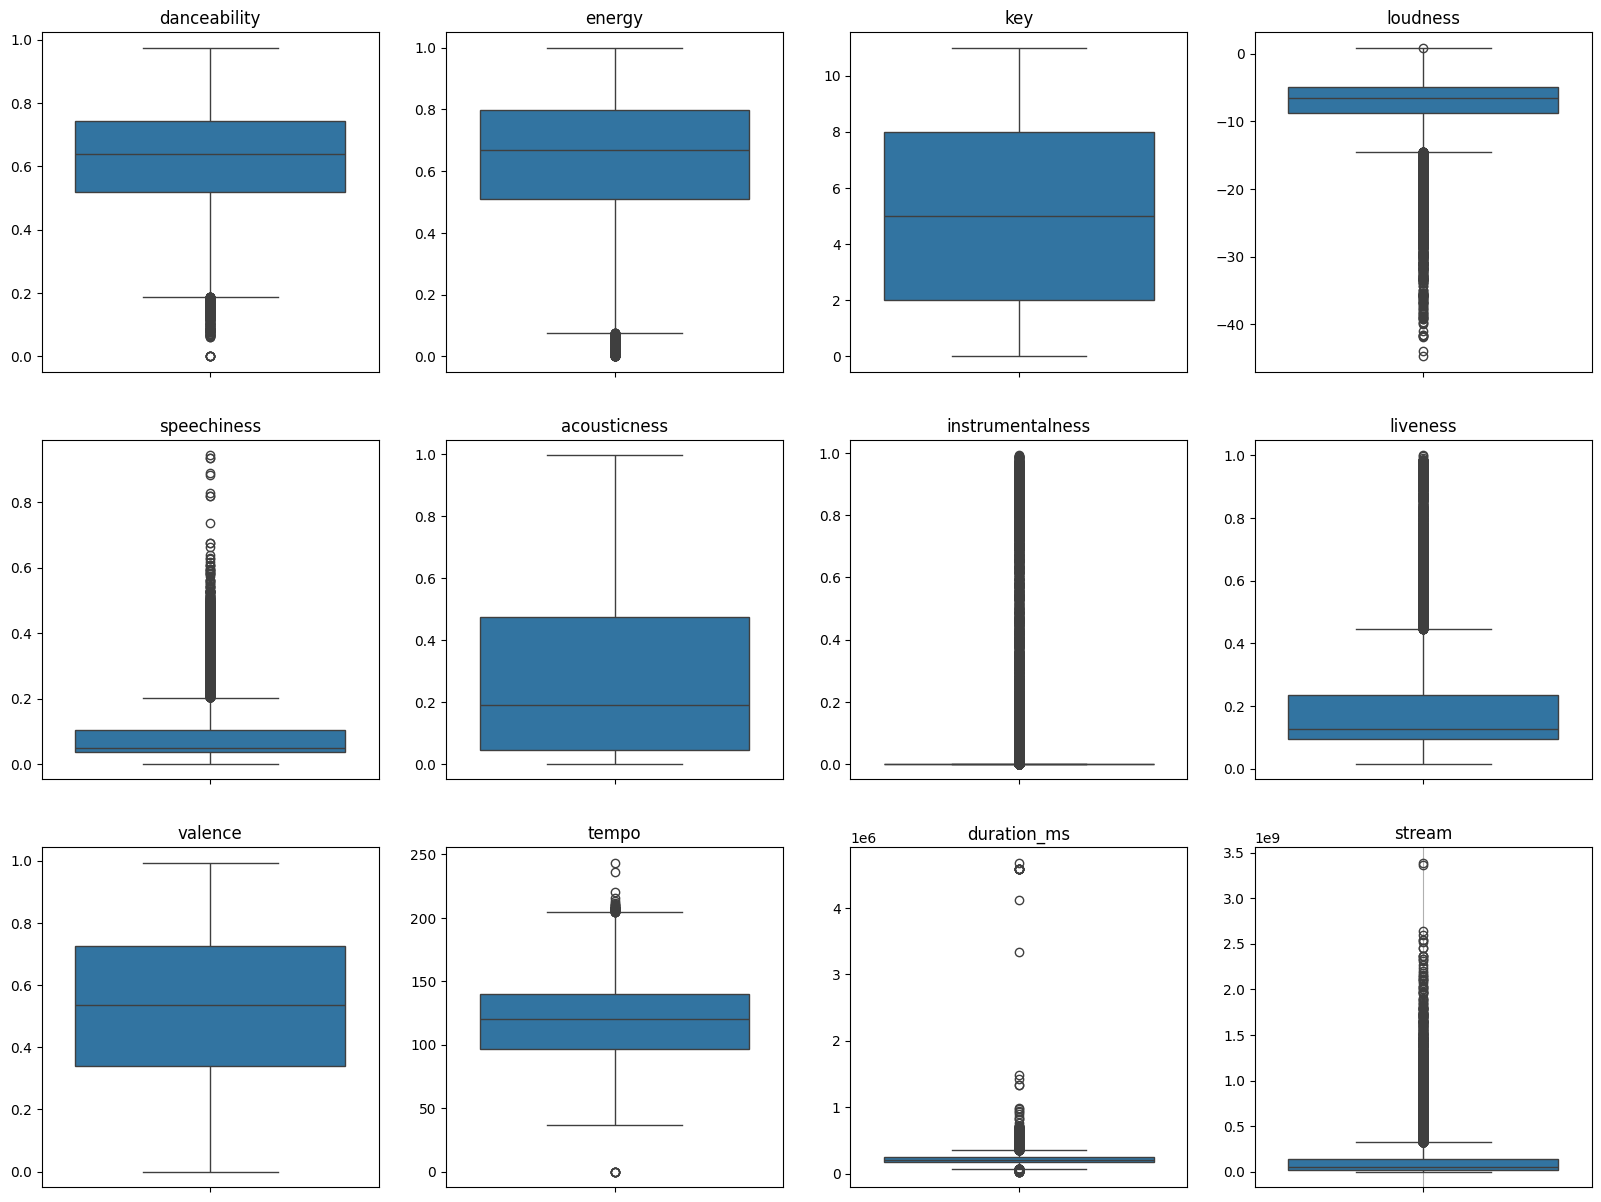

In [35]:
show_boxplots()

Уберём из датасета треки с экстремальными значениями:
- duration_ms - судя по боксплоту, длинные треки встречаются редко, для дальнейшего построения модели они не пригодятся.
- tempo - треки с слишком высоким темпом (более 200 BPM) неслушабельны для большинства слушателей, являются представителями экспериментальных жанров.
- loudness - слишком тихие треки встречаются редко, также редко пользуются популярностью у большинства слушателей.

In [36]:
df = df.drop(df[(df.duration_ms > np.quantile(df.duration_ms, 0.75)) | (df.tempo > 200) | (df.loudness < np.quantile(df.loudness, 0.25))].index)

# Постройте матрицу корреляций числовых переменных.

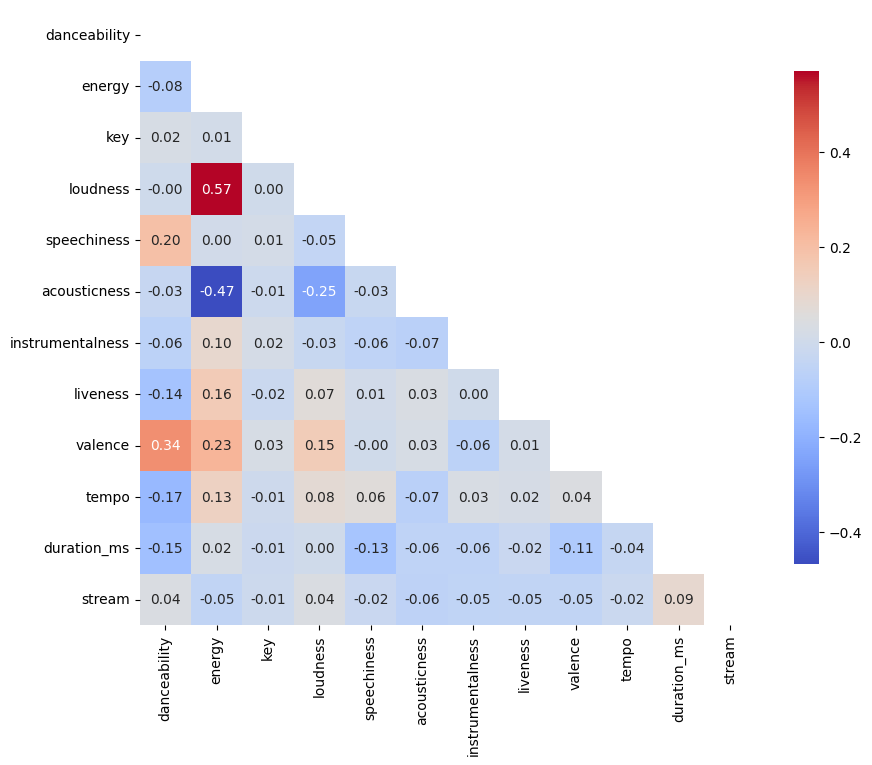

In [37]:
def df_heatmap(the_df):
    correlation_matrix = the_df.select_dtypes(include=['number']).corr()

    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8}, mask=mask)

    plt.show()

df_heatmap(df)

**На данном этапе корреляций между признаками в датафрейме и переменной stream не было выявлено. Проверим корреляцию в изначальном датасете.**

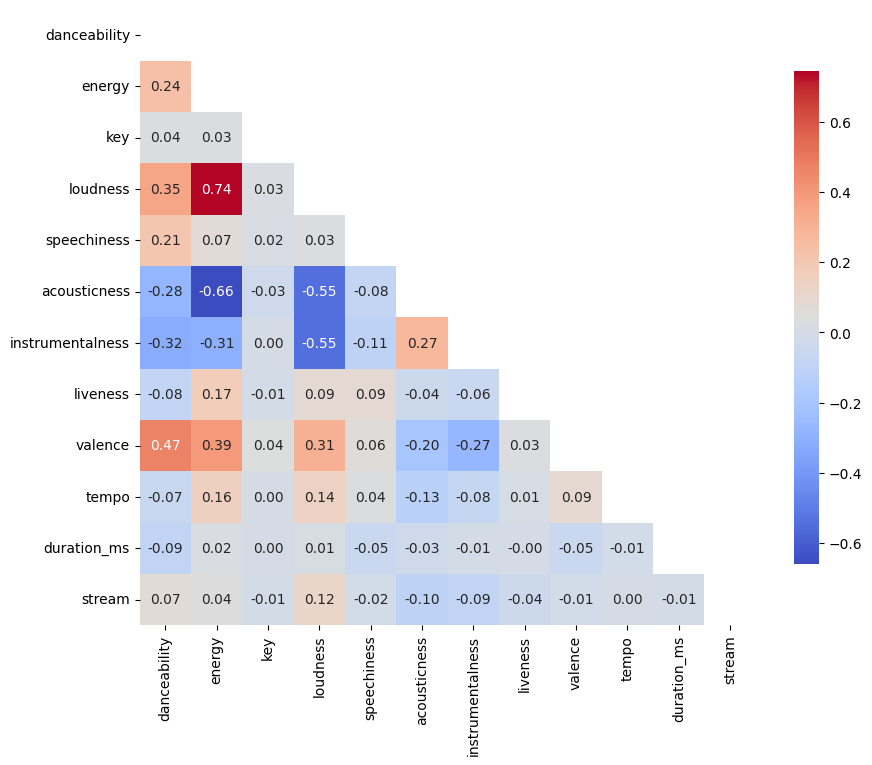

In [38]:
df_old = pd.read_csv('/content/Spotify-Dataset-from-Kaggle.txt')

del df_old['Unnamed: 0']
df_old.columns = df.columns.str.lower().str.replace(' ', '_')

df_heatmap(df_old)

**В изначальных данных ситуация такая же.
Вывод: не было выявлено зависимостей между перемнной stream и признаками в датасете.**